In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Задание 1

[Решение](hw_task_2.pdf)

$ N = 90$

In [2]:
# та же функция
t = np.linspace(0, 1000, 1001)
p0 = 200
t0 = 1000

# Смоделируем измерения с погрешностью
p = p0 / (1 + t / t0) + 0.1 * np.random.randn(len(t))

# Истинное значение производной - для сравнения
pprime = -p0 / t0 / (1 + t / t0)**2; 

In [3]:
def diff_n(t, p, n):
    return (p[n:] - p[:-n]) / (t[n:] - t[:-n])

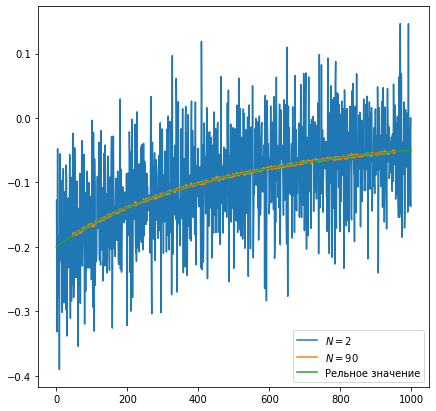

In [4]:
plt.figure(figsize=(7, 7))
N = 2
plt.plot(t[N//2:-N//2], diff_n(t, p,  N), label="$N = 2$")
N = 90
plt.plot(t[N//2:-N//2], diff_n(t, p,  N), label="$N = 90$")

plt.plot(t, pprime, label="Рельное значение")

plt.legend()
plt.show()

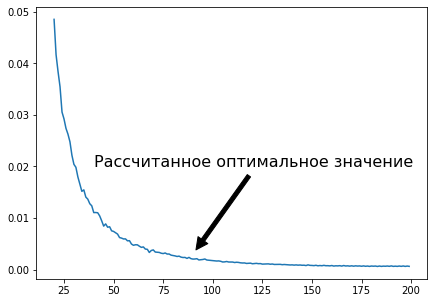

In [5]:
# вычислим среднеквадратичную ошибку
plt.figure(figsize=(7, 5))

begin = 20 # начальное N
end = 200 # конечное N

msq = np.zeros(end)
for i in range(begin, end):
  # print(i, diff_n(t, p, i).size, pprime[i//2:-i//2].size)
  msq[i] = np.sum((diff_n(t, p, i) - pprime[i//2:-i//2]) ** 2)


plt.plot(np.arange(begin, end), msq[begin:])
plt.annotate("Рассчитанное оптимальное значение", (90, 3e-3), xytext=(40, 0.02), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)

plt.show()

# Задание 2

In [6]:
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline

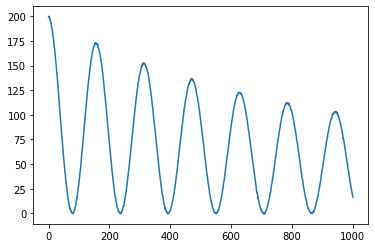

In [7]:
w0 = 0.04
u = p0 / (1 + t/t0) * (0.5 + 0.5 * np.cos(w0 * t)) + 0.5 * np.random.randn(len(t))
uprime = -p0*t0*(1 + np.cos(w0*t) + (t+t0)*w0*np.sin(w0*t))/(2*(t+t0)**2)

plt.plot(t, u)
plt.show()

In [8]:
Usmooth = UnivariateSpline(t, u, s=100)

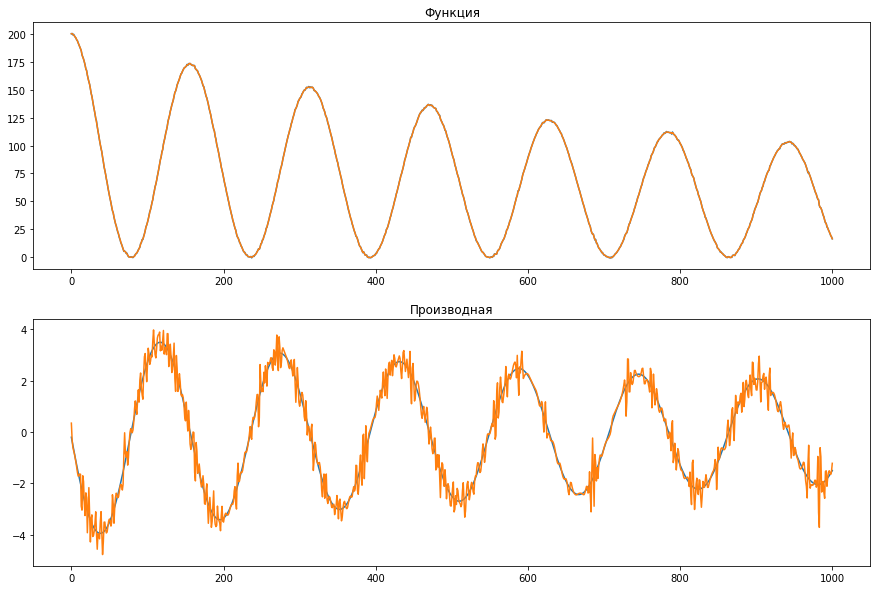

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("Функция")
plt.plot(t, u)
plt.plot(t, Usmooth(t))

plt.subplot(212)
plt.title("Производная")
plt.plot(t, uprime)
plt.plot(t, Usmooth.derivative()(t))
plt.show()

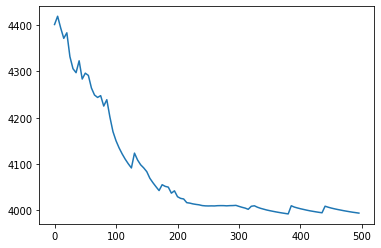

In [10]:
# вычислим ошибку производной при различных значениях s

n = 100
step = 5
errors = np.zeros(n)

for i in range(0, n):
    u_smooth = UnivariateSpline(t, u, s=i*step)
    errors[i] = np.sum((u_smooth.derivative()(t) - pprime) ** 2)

plt.plot(np.arange(0, n) * step, errors)
plt.show()

По графику видим, что после $s = 200$ особых улучшений не видно

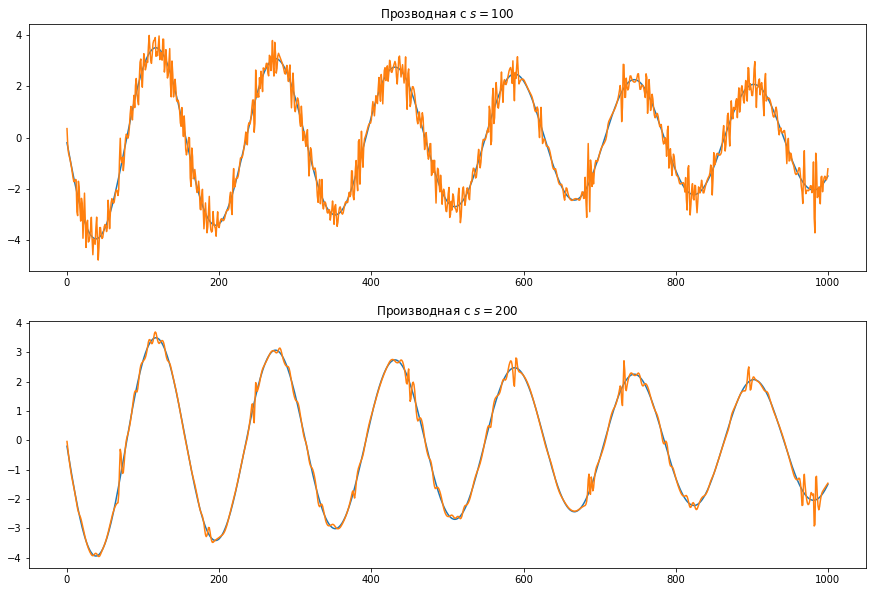

In [11]:
Usmooth_200 = UnivariateSpline(t, u, s=200)

plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title("Прозводная с $s = 100$")
plt.plot(t, uprime)
plt.plot(t, Usmooth.derivative()(t))

plt.subplot(212)
plt.title("Производная c $s = 200$")
plt.plot(t, uprime)
plt.plot(t, Usmooth_200.derivative()(t))
plt.show()

# Задание 3

[Решение](hw_task_3.pdf)

$h^* \approx \frac{3}{2} \sqrt[5]{\frac{\Delta f}{M_5}}$

# Задание 4

In [12]:
def diff_spline(u, t):
    return (u(t[:-4]) - 8 * u(t[1:-3]) + 8 * u (t[3:-1]) - u(t[4:])) / (12 * (t[1] - t[0]))

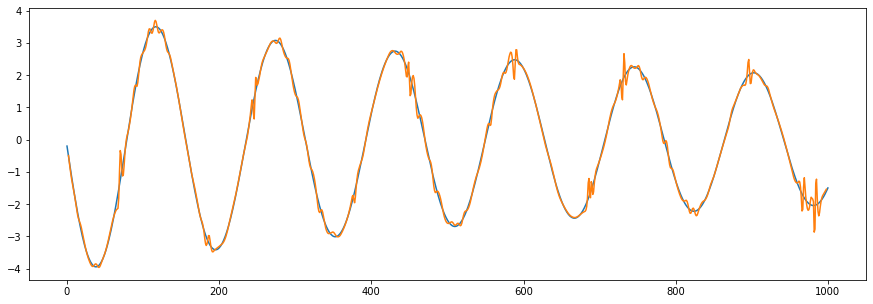

In [13]:
plt.figure(figsize=(15, 5))

plt.plot(t, uprime)
plt.plot(t[2:-2], diff_spline(Usmooth_200, t))
plt.show()

In [14]:
def diff_spline_90(u, t):
    return (u(t[:-180]) - 8 * u(t[45:-135]) + 8 * u (t[135:-45]) - u(t[180:])) / (12 * (t[45] - t[0]))

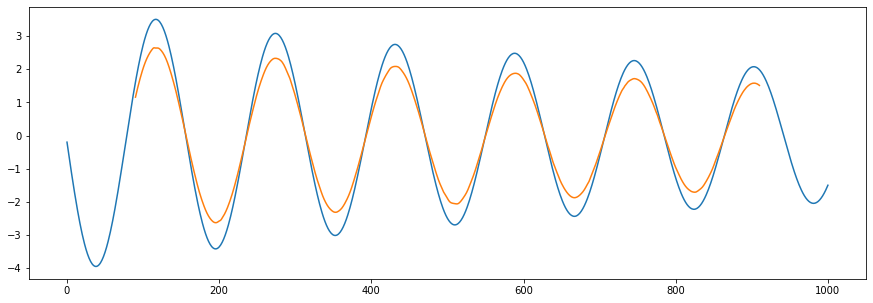

In [15]:
plt.figure(figsize=(15, 5))

plt.plot(t, uprime)
plt.plot(t[90:-90], diff_spline_90(Usmooth_200, t))
plt.show()

Видим, что расстояние в **90** точек не подходит для этого метода.  
Это связано с осциллирующей природой исходной функции.

# Задание 5, 6

[решение](hw_1_2_3.pdf)